In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Constant: It's value never change.

Placeholder: Space for a value.

feed_dict It contains the concrete values for the placeholders

In [0]:
x=tf.Variable(3,name='x')
y=tf.Variable(4,name='y')
f=x*x*y +y+2

In [6]:
sess=tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result=sess.run(f)
print(result)

42


In [7]:
sess.close

<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x7fb09d4525c0>>

In [0]:
with tf.Session() as sess:
  x.initializer.run()
  y.initializer.run()
  result1=f.eval()

In [11]:
print(result1)

42


The codes above, initiliazes each variable indepently. However, we can initialize them ah the same time

In [0]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
  init.run()
  result2=f.eval()

In [14]:
print(result2)

42


In [0]:
sess.close()

In [0]:
tf.reset_default_graph()

**Linear Regression**

In [0]:
#Model Parameters
W=tf.Variable([0.2],tf.float32)
b=tf.Variable([-0.1],tf.float32)
#Now create the placeholder for x
x=tf.placeholder(tf.float32)
#And the linear model
linear_model=W*x+b
#Finally, the placeholder for the observations
y=tf.placeholder(tf.float32)

In [0]:
#The loss function is the mean square
loss=tf.reduce_sum(tf.square(linear_model-y))

In [0]:
#The optimizer is the Gradient Descent
optimizer=tf.train.GradientDescentOptimizer(0.001)
train=optimizer.minimize(loss)
#Let's create some synthetic data
x_train=[1,2,3,4,5,6,7,8,9,10,11]
y_train=[1,2,3,4,5,6,7,8,9,10,11]

In [38]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
for i in range(10000):
  sess.run(train,{x:x_train,y:y_train})
  curr_W,curr_b,curr_loss=sess.run([W,b,loss],{x:x_train,y:y_train})

print('W: %s b: %s loss %s' % (curr_W,curr_b,curr_loss))


W: [0.9999999] b: [7.154858e-07] loss 1.0942358e-12


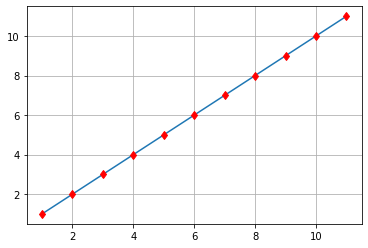

In [39]:
y=0.99999*np.array(x_train)-7.15e-7
plt.plot(np.array(x_train),y)
plt.plot(np.array(x_train),np.array(y_train),'rd')
plt.grid()